# Defining our question:

How we can predict which individuals are most likely to have or use a bank account?

Looking at the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda.

Providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# Reading our Dataset

In [2]:
# loading our first dataset
df = pd.read_csv ('/content/Financial Dataset - 1.csv')

# reading our dataset
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [3]:
# loading our second dataset
definitions = pd.read_csv ('/content/VariableDefinitions.csv')

# reading our dataset
definitions.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


In [4]:
# determining number of records in our datasets

print (df.shape)

print (definitions.shape)

(23524, 13)
(12, 2)


In [5]:
# checking at the columns datatypes

print (df.dtypes)

print (definitions.dtypes)

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object
Variable Definitions    object
Unnamed: 1              object
dtype: object


# External Data Source Validation

The dataset we have does not match the information in the seperate links for each country

# Tidying the Dataset

In [0]:
# fixing messy column names in our first dataset

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# fixing typos
df.columns = df.columns.str.replace('the_relathip_with_head', 'relationship_with_head')


In [0]:
# fixing messy column names in our second dataset

definitions.columns = definitions.columns.str.replace('Variable Definitions', 'variable').str.replace('Unnamed: 1','definition')


In [0]:
# dropping the column uniqueid as it is not relevant in our dataset

df.drop(columns= 'uniqueid', axis=0, inplace = True)

In [9]:
# reading our datasets to check if our changes have been uploaded

df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
definitions.head()

,variable,definition
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


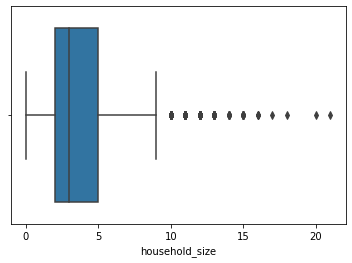

In [11]:
# checking for outliers
# household size outliers using box plots

sns.boxplot (x = df['household_size'])

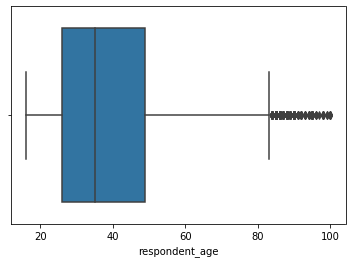

In [12]:
# respondent age outliers
sns.boxplot (x = df['respondent_age'])

In [13]:
# calculating IQR for each column
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (IQR)


year               2.0
household_size     3.0
respondent_age    23.0
dtype: float64


In [14]:
#Removing the outliers using IQR
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_iqr.shape)

(22903, 12)


In [15]:
# Identifying the Missing Data
#
df.isnull().values.any()

True

In [16]:
df.isnull().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [0]:
#  we will go ahead and drop the missing values

df_drop = df.dropna(inplace=True)

In [18]:
df.shape

(23343, 12)

# Exploratory Analysis

In [19]:
df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# univariate analysis

In [0]:
# Numerical analysis

Year


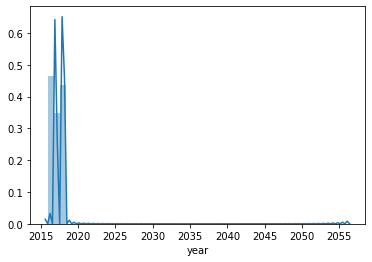

In [21]:
sns.distplot(df.year.dropna());

# the active years on the dataset are years 2016 through to 2018 and tis is seen on the graph below.

Household Size

3.6886432763569377
3.0
0    2.0
dtype: float64


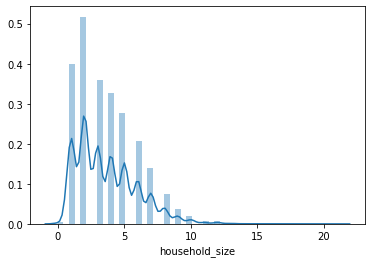

In [22]:
sns.distplot(df.household_size.dropna());
print (df.household_size.mean())
print (df.household_size.median())
print (df.household_size.mode())

# This graph is positively skewed meaning most values are between the values  1 and 7.
# The household size has a mean of 4 people per household

 Respondent Age

38.80550914621085
35.0
0    30.0
dtype: float64


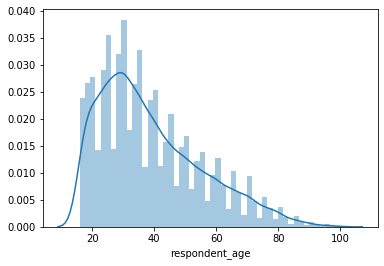

In [23]:
sns.distplot(df.respondent_age.dropna());
print (df.respondent_age.mean())
print (df.respondent_age.median())
print (df.respondent_age.mode())

# the graph is positively skewed meaning most of the values are in between 20 and 60
# the mean for the respondent age is 35

Categorical variables

Country

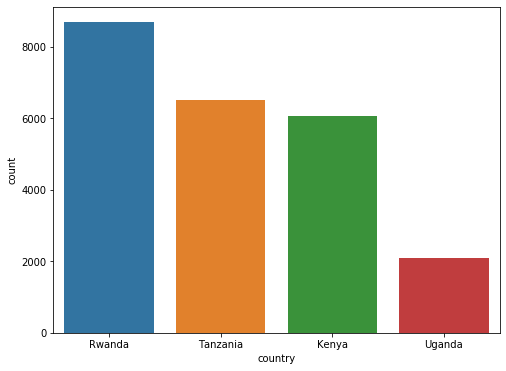

In [24]:
plt.figure(figsize=(8, 6))

sns.countplot(df.country.dropna(), order = df.country.value_counts().index);

# From the graph below, we can see that Rwanda leads in the financial scope followed by Tanzania and Uganda is the last is the financial scope

Bank Account Holders

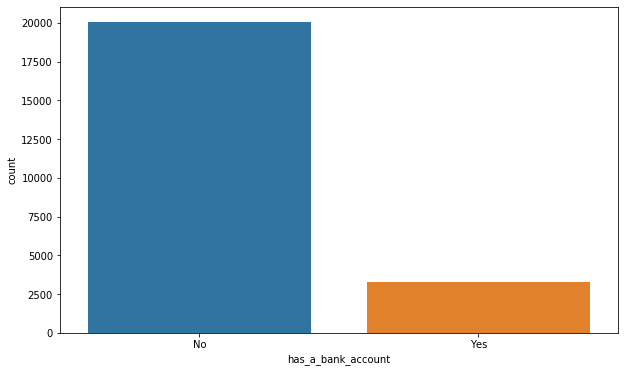

In [25]:
plt.figure(figsize=(10, 6))

sns.countplot(df.has_a_bank_account.dropna(), order = df.has_a_bank_account.value_counts().index);

# most respondents do not have a bank account this could be because most people come from the rural areas.

Location

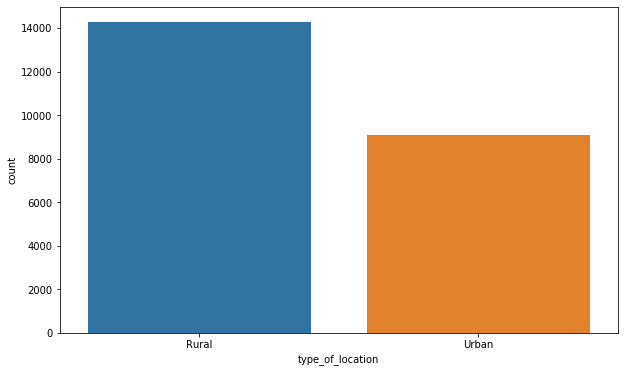

In [26]:
plt.figure(figsize=(10, 6))

sns.countplot(df.type_of_location.dropna(), order = df.type_of_location.value_counts().index);

# Most of our respondents were from the rural areas

Cell Phone Access

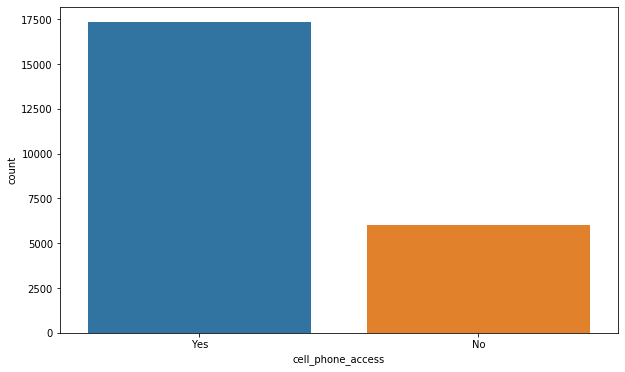

In [27]:
plt.figure(figsize=(10, 6))

sns.countplot(df.cell_phone_access.dropna(), order = df.cell_phone_access.value_counts().index);

# most respondents have phone access, bearing in mind that the larger percentage comes from rural areas and have no access to bank services, 
# this finding is rather surprising i must say.

Gender

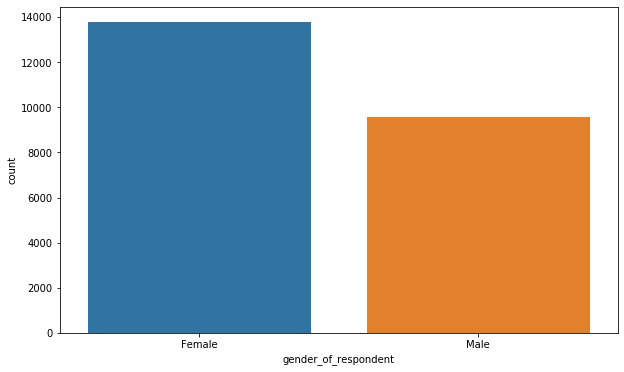

In [28]:
plt.figure(figsize=(10, 6))

sns.countplot(df.gender_of_respondent.dropna(), order = df.gender_of_respondent.value_counts().index);

# we have more females than males from our respondents

Relationship with the head

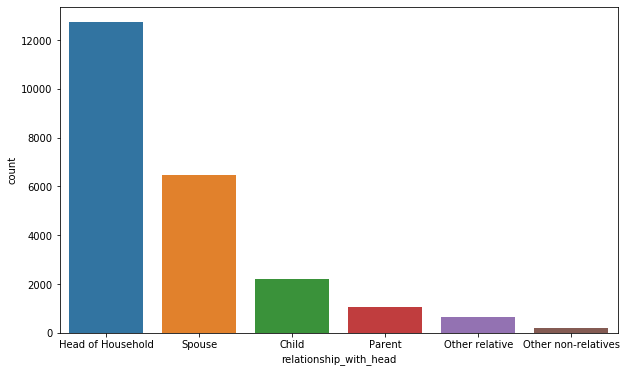

In [29]:
plt.figure(figsize=(10, 6))

sns.countplot(df.relationship_with_head.dropna(), order = df.relationship_with_head.value_counts().index);

# from the graph we can see that most respondents were the heads of the households
# the next category were the spouses to the heads while the last group are the non relatives.

Marital Status

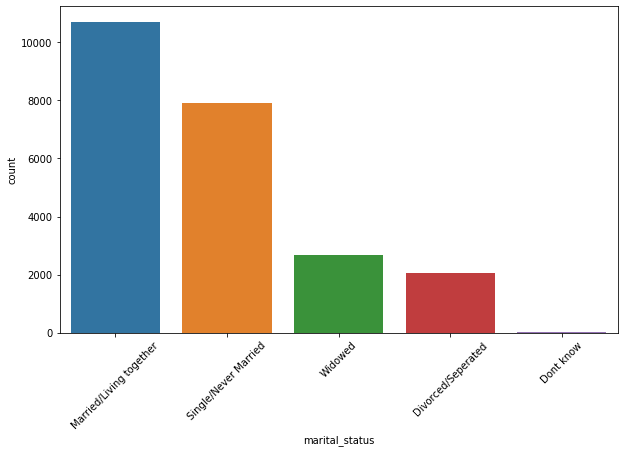

In [30]:
plt.figure(figsize=(10, 6))

sns.countplot(df.marital_status.dropna(), order = df.marital_status.value_counts().index)

plt.xticks(rotation=45);

# most respondents are either married or living together closely followed by those who are single or have never been married

Education Levels

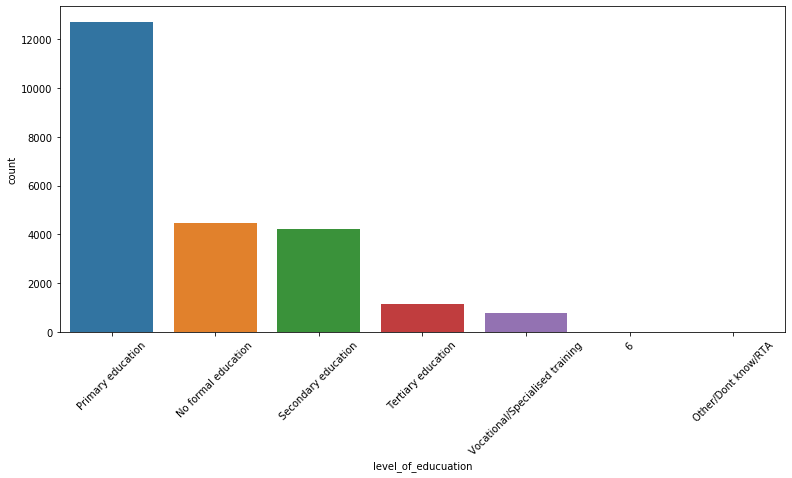

In [31]:
plt.figure(figsize=(13, 6))

sns.countplot(df.level_of_educuation.dropna(), order = df.level_of_educuation.value_counts().index)

plt.xticks(rotation=45);

# most respondent's highest level of education is primary school. 
# this could be brought about by the fact that most respondents come from the rural areas.


Type of job

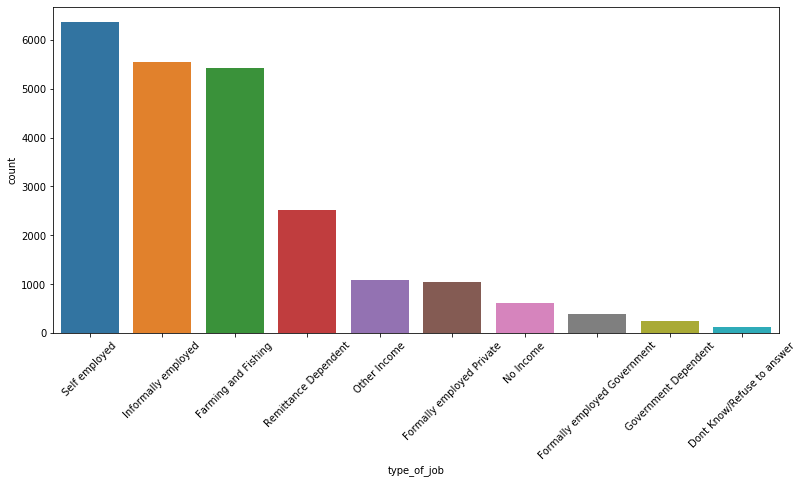

In [32]:
plt.figure(figsize=(13, 6))

sns.countplot(df.type_of_job.dropna(), order = df.type_of_job.value_counts().index)

plt.xticks(rotation=45);

# most people are self employedm informally employed and farming/fishing. 
# this finding is expected based on location

From our univariate findings, we will compare some fields such as location and access to a bank account to see if they are correlated.



We will also compare location and level of education as well as location and type of job as these cases seem to be related

We can also look at the type of job in relation to access to bank account and type of job in relation to education levels to gain some insights on how education levels affect the type of jobe one gets and if job type has influence of one having a bank account

# Bivariate Analysis

In [38]:
df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [66]:
df.corr()

,year,household_size,respondent_age
year,1.000000,-0.048902,-0.019062
household_size,-0.048902,1.000000,-0.119709
respondent_age,-0.019062,-0.119709,1.000000


Heat Map

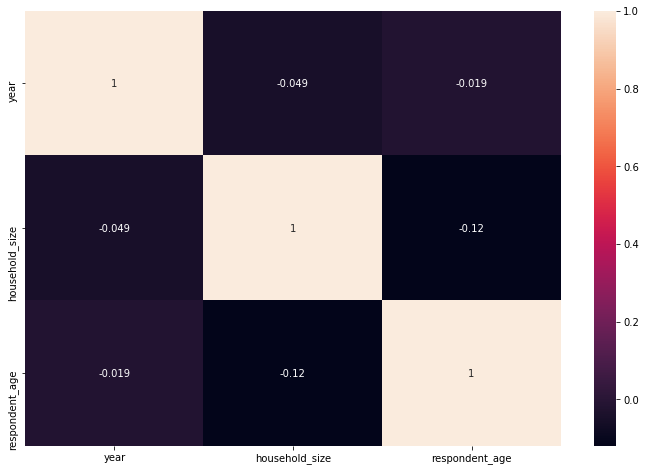

In [33]:
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

# we can see from the heat map that there is no correspondense between the numerical values

Crossplots

<Figure size 1008x1008 with 0 Axes>

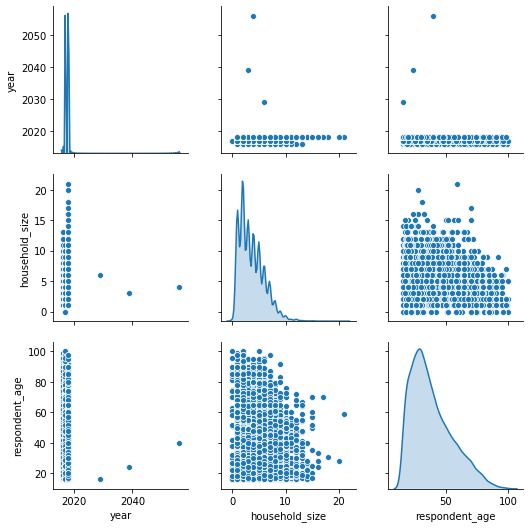

In [34]:
plt.figure(figsize=(14, 14))

sns.pairplot(df, diag_kind='kde');

Job Type Vs Has a Bank account

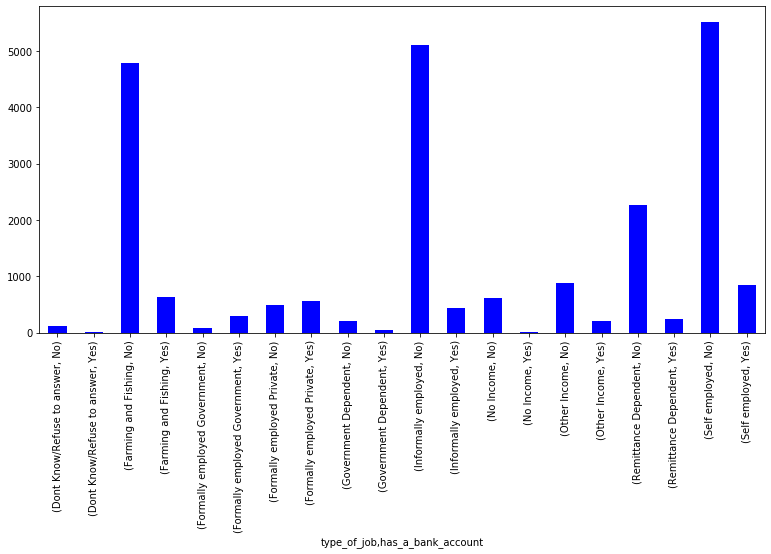

In [63]:
plt.figure(figsize=(13, 6))

a = df.groupby (['type_of_job','has_a_bank_account'])['has_a_bank_account'].count()

a.plot(kind='bar',  color='blue')

plt.xticks(rotation=90);

# From this, we can see that

Education Level VS Bank Account 

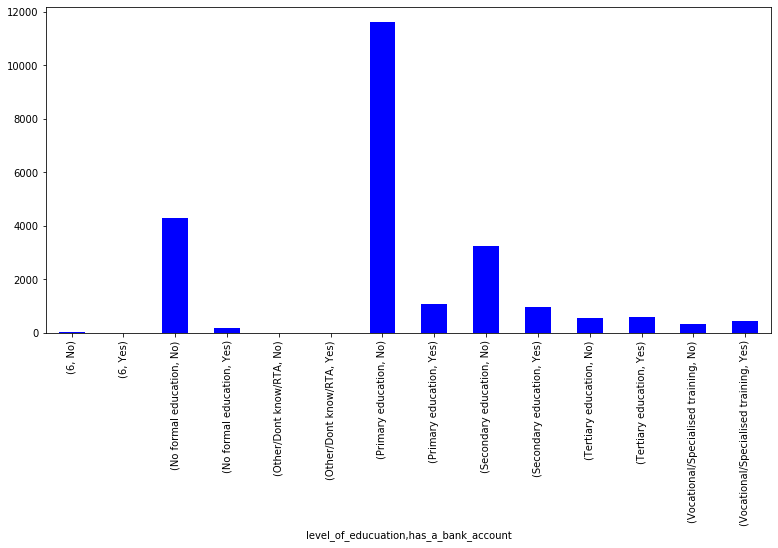

In [62]:
plt.figure(figsize=(13, 6))

a = df.groupby (['level_of_educuation','has_a_bank_account'])['has_a_bank_account'].count()

a.plot(kind='bar',  color='blue')

plt.xticks(rotation=90);

Location Vs Type of job

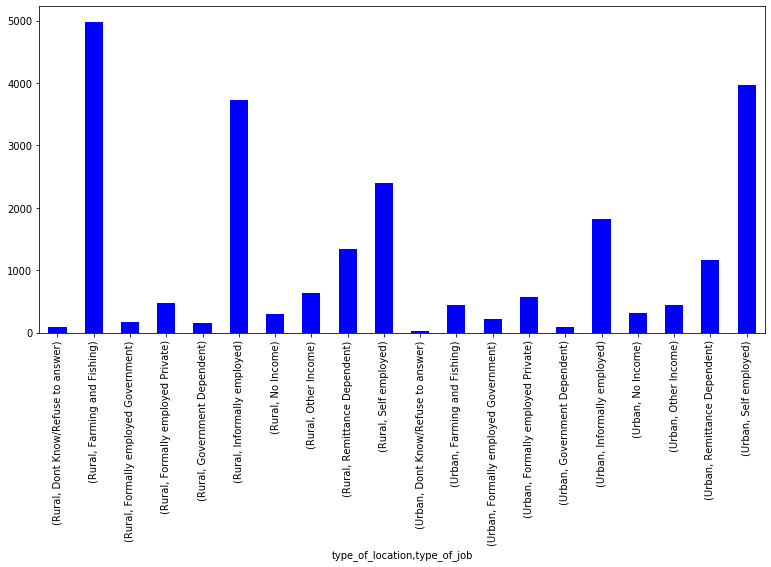

In [64]:
plt.figure(figsize=(13, 6))

a = df.groupby (['type_of_location','type_of_job'])['has_a_bank_account'].count()

a.plot(kind='bar',  color='blue')

plt.xticks(rotation=90);

Type of location Vs Bank Account

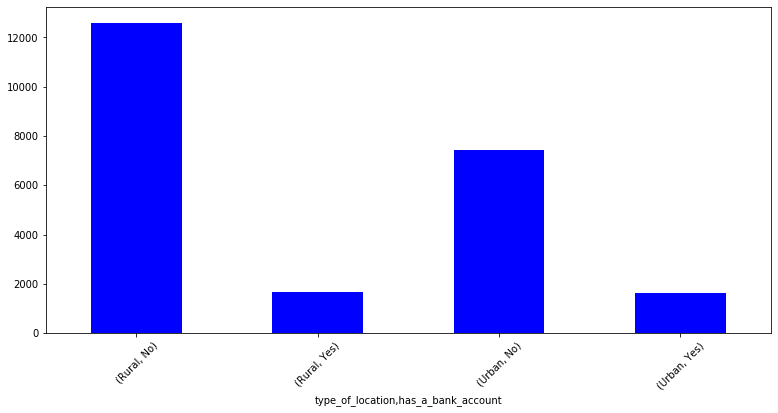

In [40]:
plt.figure(figsize=(13, 6))

a = df.groupby (['type_of_location','has_a_bank_account'])['has_a_bank_account'].count()

a.plot(kind='bar',  color='blue')

plt.xticks(rotation=45);

Location Vs Education Levels

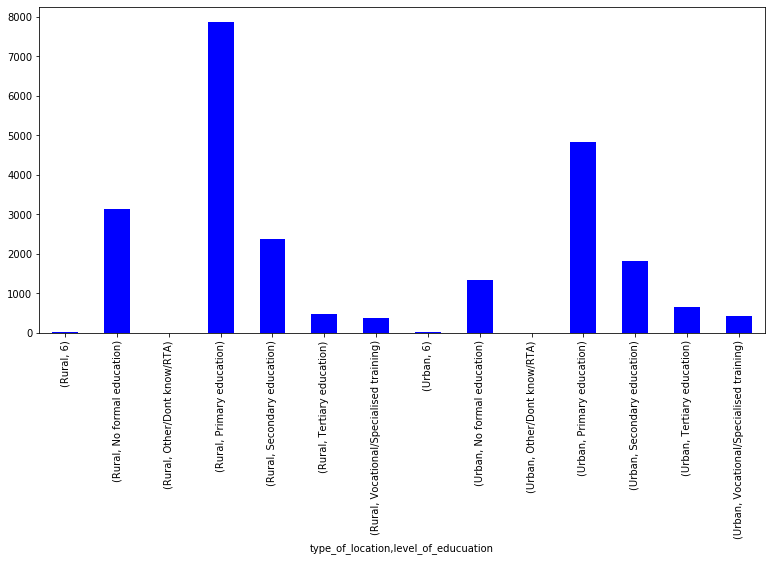

In [65]:
plt.figure(figsize=(13, 6))

a = df.groupby (['type_of_location','level_of_educuation'])['has_a_bank_account'].count()

a.plot(kind='bar',  color='blue')

plt.xticks(rotation=90);

Multivariate Analysis

In [0]:
# Preprocessing

X = df.iloc[:, 6:-5].values
y=df['has_a_bank_account']

In [51]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(array([[28.],
        [80.],
        [25.],
        ...,
        [30.],
        [33.],
        [66.]]), array([[45.],
        [80.],
        [48.],
        ...,
        [35.],
        [20.],
        [51.]]), 10935     No
 2069      No
 6777      No
 19669     No
 20504    Yes
         ... 
 13130    Yes
 19807    Yes
 9852     Yes
 10806     No
 2736      No
 Name: has_a_bank_account, Length: 18674, dtype: object, 10622    No
 10648    No
 17902    No
 31       No
 14678    No
          ..
 15950    No
 1040     No
 10984    No
 2039     No
 13604    No
 Name: has_a_bank_account, Length: 4669, dtype: object)

In [0]:
# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

In [0]:
# Using 1 Principal Component

rom sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [47]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))


[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


# Discriminant Analysis

In [0]:
# Dividing the dataset
x = df.iloc[:, 6:-5].values
y=df['gender_of_respondent']

In [55]:
# dividing data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(array([[28.],
        [80.],
        [25.],
        ...,
        [30.],
        [33.],
        [66.]]), array([[45.],
        [80.],
        [48.],
        ...,
        [35.],
        [20.],
        [51.]]), 10935    Female
 2069       Male
 6777       Male
 19669      Male
 20504      Male
           ...  
 13130      Male
 19807    Female
 9852     Female
 10806    Female
 2736       Male
 Name: gender_of_respondent, Length: 18674, dtype: object, 10622      Male
 10648    Female
 17902    Female
 31         Male
 14678      Male
           ...  
 15950      Male
 1040     Female
 10984    Female
 2039     Female
 13604      Male
 Name: gender_of_respondent, Length: 4669, dtype: object)

In [0]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Performing Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [58]:
# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
# Evaluating the Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[2747    0]
 [1922    0]]
Accuracy0.5883486828014565
